In [1]:
import pandas as pd
import sys
from tqdm import tqdm
sys.path.append("../")
from tcad.tools.nntools import SmilesDataSet, SmilesEncoder
from tcad.deep.fit import train_gan
from torch.utils.data import DataLoader
from tcad.deep.models import GAN
import matplotlib.pyplot as plt
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
data = pd.read_csv("../data/androgen_data.csv")
smiles = data["canonical_smiles"].to_list()

smiles_dataset = SmilesDataSet(smiles)
senc = SmilesEncoder(smiles)
dataloader = DataLoader(smiles_dataset, batch_size=128)

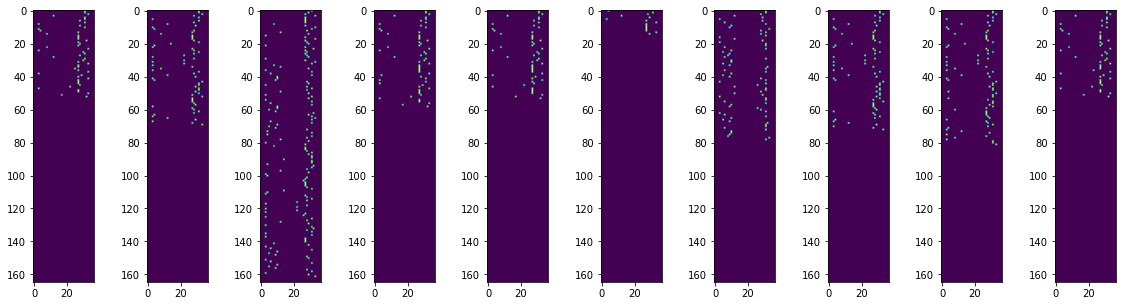

In [3]:
_, ax = plt.subplots(1, 10, figsize = (20, 5))

for i in range(10):
    ax[i].imshow(smiles_dataset[i].squeeze())

In [4]:
GENERATOR_LEARNING_RATE = 0.0002
DISCRIMINATOR_LEARNING_RATE = 0.0002

model = GAN(240).to(DEVICE)

optim_gen = torch.optim.Adam(model.generator.parameters(),
                             betas=(0.5, 0.999),
                             lr=GENERATOR_LEARNING_RATE)

optim_discr = torch.optim.Adam(model.discriminator.parameters(),
                               betas=(0.5, 0.999),
                               lr=DISCRIMINATOR_LEARNING_RATE)

In [12]:
train_gan(dataloader, model, optim_gen, optim_discr, loss_func="wasserstein", epochs=300)

Epoch: 0 Discriminator loss: -0.05971733880844681 Generator loss: 0.03900709042001438
Epoch: 10 Discriminator loss: -0.056397987051096346 Generator loss: -0.059307650860578494
Epoch: 20 Discriminator loss: -0.05228822045449458 Generator loss: 0.19109703526413663
Epoch: 30 Discriminator loss: -0.044371200337568285 Generator loss: 0.03244645332582405
Epoch: 40 Discriminator loss: -0.048021080322204646 Generator loss: 0.3745114702918185
Epoch: 50 Discriminator loss: -0.05223579078092222 Generator loss: 0.4578125485335362
Epoch: 60 Discriminator loss: -0.06320983284998286 Generator loss: 0.07807019457968288
Epoch: 70 Discriminator loss: -0.06112747659564252 Generator loss: 0.3809715228739507
Epoch: 80 Discriminator loss: -0.06853177757858642 Generator loss: 0.6586677840149859
Epoch: 90 Discriminator loss: -0.05866148846339325 Generator loss: 0.6555357822626389
Epoch: 100 Discriminator loss: -0.06099844834856116 Generator loss: 0.5816919766754762
Epoch: 110 Discriminator loss: -0.0619811776

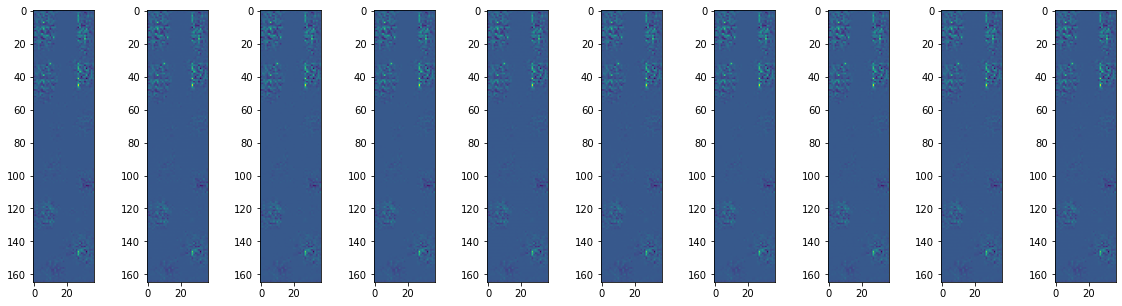

In [13]:
noise = torch.randn(1200, model.latent_dim, device=DEVICE)

out = model.generator_forward(noise).detach().cpu().numpy().squeeze()

_, ax = plt.subplots(1, 10, figsize = (20, 5))

for i in range(10):
    ax[i].imshow(out[i+10])